In [2]:
#Imports
import scipy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re
import os
import scipy

In [3]:
"""Specify files extension identifiers and parse current directory for csv full paths"""
#File strings [EDITABLE]
layers_ext = "layer"
spt_ext = "spt"
explor_ext = "explor"

#build paths
dir_path = os.getcwd()
file_paths = []
for f in os.listdir(dir_path):
    if f.endswith(".csv"):
        file_paths.append(os.path.join(dir_path, f))

#parse paths
spt_path = [s for s in file_paths if spt_ext in s][0]
lyr_path = [s for s in file_paths if layers_ext in s][0]
explor_path = [s for s in file_paths if explor_ext in s][0]

print("Exploration CSV path:\n{}\n".format(explor_path))
print("SPT N-Value CSV path:\n{}\n".format(spt_path))
print("Geological Layers CSV path:\n{}\n".format(lyr_path))

Exploration CSV path:
/Users/matthew/liqpy/liquepy/test_explor.csv

SPT N-Value CSV path:
/Users/matthew/liqpy/liquepy/test_spt.csv

Geological Layers CSV path:
/Users/matthew/liqpy/liquepy/test_layers.csv



In [4]:
#Read input blowcounts csv
df = pd.read_csv(spt_path, index_col=['OBJECT_ID'])

"""Creates list of full tuples from df"""
def slice_dice(df):
    data_list = []
    for r in df.itertuples():
        data_list.append(r)
    return data_list

nvalue_list = slice_dice(df)

"""Build list of necessary tuples, convert values to floats 
from two df columns for interpolation"""
def three_tuple(somelist):
    #Index
    list_1 = []
    for itup in somelist:
        list_1.append(float(itup[1]))
    #X
    list_2 = []
    for itup in somelist:
        list_2.append(float(itup[2]))
    #Y
    list_3 = []
    for itup in somelist:
        list_3.append(itup[3])
    tuplist = list(zip(list_1, list_2, list_3))
    return tuplist

def two_tuple(somelist):
    """X-value"""
    list_1 = []
    for itup in somelist:
        list_1.append(float(itup[0]))
    """Y-value"""
    list_2 = []
    for itup in somelist:
        list_2.append(float(itup[1]))
    tuplist = list(zip(list_1, list_2))
    return tuplist

def unpack_two_tuple(sometuplelist):
    """X-value"""
    list_1 = []
    for itup in sometuplelist:
        list_1.append(itup[0])
    """Y-value"""
    list_2 = []
    for itup in sometuplelist:
        list_2.append(itup[1])
    return list_1, list_2

itupdata = three_tuple(nvalue_list)

In [5]:
"Group tuples by exploration_id"
import itertools
import operator

def group_tuples(tuple_list, indexing_tuplenumber):
    n_data = [list(group) for key,group in itertools.groupby(tuple_list,operator.itemgetter(indexing_tuplenumber))]
    return n_data

nvalues_data = group_tuples(itupdata,0)
itupdata

[(1.0, 0.0, 12),
 (1.0, 1.0, 10),
 (1.0, 4.0, 26),
 (1.0, 7.0, 55),
 (1.0, 8.0, 45),
 (1.0, 11.0, 60),
 (1.0, 13.0, 51),
 (2.0, 0.0, 8),
 (2.0, 2.0, 30),
 (2.0, 5.0, 45),
 (2.0, 10.0, 52)]

In [6]:
"""Fill in missing n-values for depths 0 to 30 feet"""
from scipy.interpolate import interp1d

"""Build a list of tuples from interpolation with matching exploration number"""
"""Note that the tuple is ungrouped afterwards"""
"""Values outside interpolation bounds will == nan"""
def interpolate_nvalues(nvalues_data):
    nvalue_intp = []
    sizing = np.arange(0,30,0.5)
    for i in range(len(nvalues_data)):
        temp_list = list(zip(*nvalues_data[i]))
        temp_x = temp_list[1]
        temp_y = temp_list[2]
        filling = temp_list[0]
        nvalue_interpolation = interp1d(temp_x, temp_y, bounds_error=False)
        expnum = np.zeros((len(sizing)))
        expnum[expnum == 0] = filling[0]
        tuppp = list(zip(sizing, nvalue_interpolation(sizing), expnum))
        nvalue_intp.extend(tuppp)
    return nvalue_intp

blowcounts = interpolate_nvalues(nvalues_data)

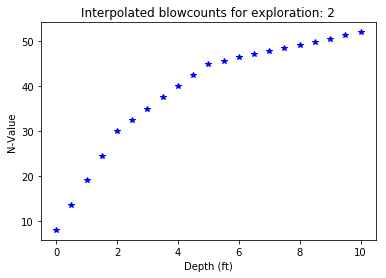

In [13]:
def graph_blowcounts(blowcounts,exploration_number):
    temp_list = []
    for u in blowcounts:
        if u[2] == exploration_number:
            temp_list.append(u)
    i,j = unpack_two_tuple(temp_list)
    plt.plot(i,j,'*b')
    plt.title("Interpolated blowcounts for exploration: "+str(exploration_number))
    plt.xlabel("Depth (ft)")
    plt.ylabel("N-Value")
    return plt.show()

graph_blowcounts(blowcounts,2)

In [8]:
#Read input layers csv
df2 = pd.read_csv(lyr_path, index_col=['OBJECT_ID'])

In [9]:
#Alternate way of slicing, still have not flushed out
ffg = df2[df2.EXPLOR_ID == 1]
ffg = slice_dice(ffg)

In [10]:
"""Build list of necessary tuples, convert values to floats 
from two df columns for interpolation"""
def four_tuple(somelist):
    #Index
    list_1 = []
    for itup in somelist:
        list_1.append(float(itup[1]))
    #X1
    list_2 = []
    for itup in somelist:
        list_2.append(float(itup[2]))
    #X2
    list_3 = []
    for itup in somelist:
        list_3.append(float(itup[3]))
    #Y
    list_4 = []
    for itup in somelist:
        list_4.append(itup[4])
    tuplist = list(zip(list_1, list_2, list_3, list_4))
    return tuplist

In [11]:
df2_slice = slice_dice(df2)
lyr_iterdata = four_tuple(df2_slice)
lyr_data = group_tuples(lyr_iterdata,0)
lyr_data

[[(1.0, 0.0, 1.0, 'SP'),
  (1.0, 1.0, 4.0, 'SP-SM'),
  (1.0, 4.0, 7.0, 'ML'),
  (1.0, 7.0, 8.0, 'ML-CL'),
  (1.0, 8.0, 11.0, 'CL-CH'),
  (1.0, 11.0, 13.0, 'CH'),
  (1.0, 13.0, 19.0, 'ML')],
 [(2.0, 0.0, 2.0, 'SP-SW'), (2.0, 2.0, 5.0, 'SP'), (2.0, 5.0, 8.0, 'CL-CH')]]

In [12]:
fines_content = {
('SW','SP','GW','GP'):0.045,
('SW-SM','SW-SC','SP-SM','SP-SC'):0.115,
('SW-GM','SW-GC','SP-GM','SP-GC'):0.115,
('GW-SM','GW-SC','GP-SM','GP-SC'):0.115,
('GW-GM','GW-GC','GP-GM','GP-GC'):0.115,
('SM-SC','SC-SM'):0.25,
('GM-GC','GC-GM'):0.25,
('SM','GM'):0.3,
('SC','GC'):0.2,

('ML','MH'):0.75,
('CL','CH'):0.9,
('OL','OH'):0.6,
('SW-SM','SW-SC','SP-SM','SP-SC'):0.115,
('SW-GM','SW-GC','SP-GM','SP-GC'):0.115,
('GW-SM','GW-SC','GP-SM','GP-SC'):0.115,
('GW-GM','GW-GC','GP-GM','GP-GC'):0.115,
('SM-SC','SC-SM'):0.25,
('GM-GC','GC-GM'):0.25,
('SM','GM'):0.3,
('SC','GC'):0.2,
}

density_values = {
('SW','SP'):2650.0,
('GW','GP'):2700.0,
('SW-SM','SW-SC','SP-SM','SP-SC'):2650.0,
('SW-GM','SW-GC','SP-GM','SP-GC'):2650.0,
('GW-SM','GW-SC','GP-SM','GP-SC'):2650.0,
('GW-GM','GW-GC','GP-GM','GP-GC'):2650.0,
('SM-SC','SC-SM'):2650.0,
('GM-GC','GC-GM'):2650.0,
('SM','GM'):2650.0,
('SC','GC'):2650.0,
}